## Evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
import os

In [2]:
res1, res2, res3 = (pd.read_csv(os.path.join('results',
                                             f'E_B02_Sequenz_{seq}.csv'),
                                index_col=['filename', 'window', 'metric', 'emotion'])
                    for seq in (1, 2, 3))

df1, df2, df3 = (pd.read_csv(res.index[0][0], delimiter=';')
            for res in (res1, res2, res3))

res1, res2, res3 = (res.reset_index(level=0).drop('filename', axis=1)
                    for res in (res1, res2, res3))

dfs = (df1, df2, df3)
res_dfs = (res1, res2, res3)

In [3]:
res3

value
window metric       emotion              
0      plausibility Wut      0.000000e+00
       belief       Wut      0.000000e+00
       doubt        Wut      1.000000e+00
       plausibility Ekel     3.866273e-01
       belief       Ekel     0.000000e+00
...                                   ...
74     belief       Freude   0.000000e+00
       doubt        Freude   1.000000e+00
       plausibility Angst    2.220446e-16
       belief       Angst    0.000000e+00
       doubt        Angst    1.000000e+00

[1350 rows x 1 columns]

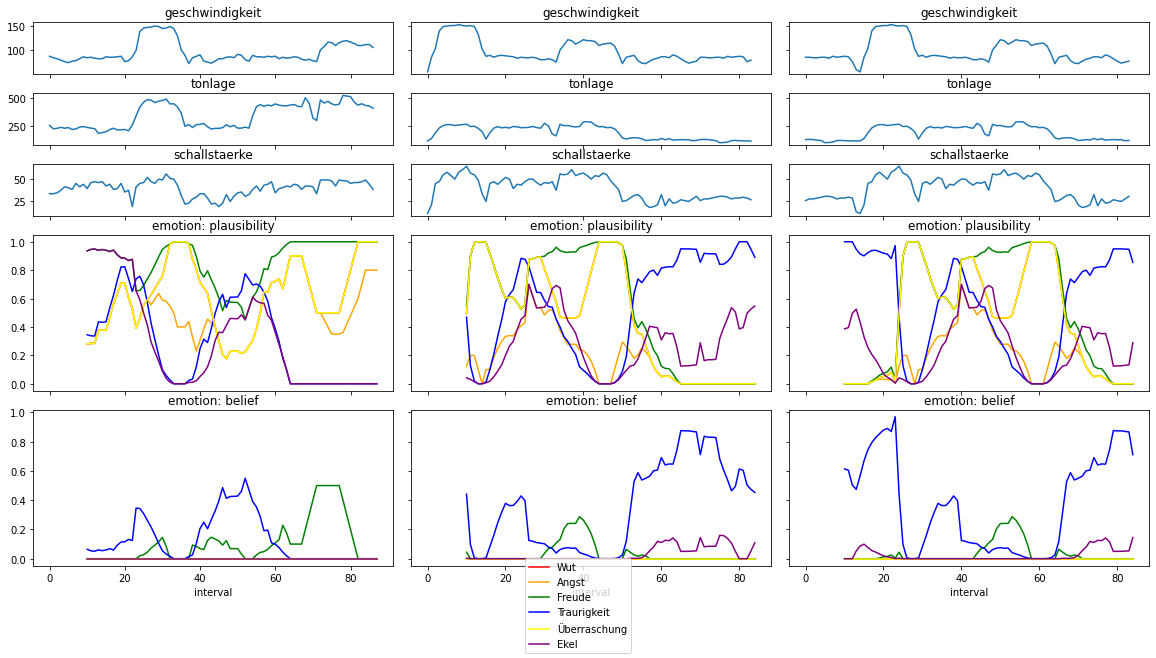

In [4]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(20,10))
gs = GridSpec(5, 3, figure=fig,
              height_ratios=[1, 1, 1, 3, 3],
              wspace=0.05)

axes = [[None for x in range(5)] for y in range(len(dfs))] 
for seq, (res, df) in enumerate(zip(res_dfs, dfs)):

    for i, col in enumerate(df):
        ax = fig.add_subplot(gs[i, seq],
                             sharex=axes[seq][i-1],
                             sharey=axes[seq-1][i])
        axes[seq][i] = ax
        df[col].plot(title=col, ax=ax)

    colors = {'Wut':'red',
              'Angst':'orange',
              'Freude':'green',
              'Traurigkeit':'blue',
              'Überraschung': 'yellow',
              'Ekel': 'purple'
             }

    for j, metric in enumerate(('plausibility', 'belief')):
        j = i + j + 1
        ax = fig.add_subplot(gs[j, seq],
                              sharex=axes[seq][j-1],
                              sharey=axes[seq-1][j])
        axes[seq][j] = ax
        for emotion in colors:
            emotions = res.loc(axis=0)[:,metric, emotion]
            emotions['window_shifted'] = emotions.index.levels[0] + 10
            emotions.plot(ax=ax,
                            x='window_shifted',
                            y='value',
                            label=emotion,
                            color=colors[emotion],
                            title=f'emotion: {metric}',
                            legend = False
                         )
            ax.set_xlabel("interval")
            handles, labels = ax.get_legend_handles_labels()
            
fig.legend(handles, labels, loc='lower center')
fig.savefig('doc/evaluation.png')

Allgemein:

Wut wird von Überraschung überlagert – deren Basismaß-Definitionen sind äquivalent.

Da Traurigkeit über eine zusätzliche Evidenz (Abweichung in der Schallstärke) unterstützt wird, in der die Traurigkeit das einzige Subjekt ist, hat es global einen höheren Belief als die anderen Emotionen. Es ist wahrscheinlicher Teilmengen $X \subset E$ für $E =$ Traurigkeit mit $m(X) > 0$ zu finden, als für andere $E$. Deswegen sollte hier die Plausibilität als Metrik bevorzugt werden.

Sequenz 1:

Bis auf den Einbruch in der Tonlage und Schallstärke in der Mitte der Sequenz scheint Freude hier die dominante Emotion zu sein. Signifikant ist hier die Höhe des Beliefs für die Freude – trotz der beschriebenen Tendenz.

Sequenz 2 und 3:

Sind ein und dieselbe Tonaufnahme um etwa 15 Sekunden verschoben. Dementsprechend herrscht hier Ähnlichkeit in der Klassifikation. 

Die Traurigkeit erscheint als plausibel nicht nur zu Anfang, wenn die Abweichung in der Schallstärke hoch ist, sondern auch später bei tiefer Tonlage und Schallstärke. Da die Schallstärke zu Ende der zweiten Sequenz wieder steigt, steigt hier auch die Plausibilität der anderen Emotionen.